In [49]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Data_FB_Campaign.csv'  
df = pd.read_csv(file_path)

df.head()


,Reporting Starts,Reporting Ends,Ad Set Name,Amount Spent,Results,Result indicator,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views
0,20/5/2022,31/5/2022,T1 - Cold - LLA - Promo May,332.65,2,actions:offsite_conversion.fb_pixel_purchase,166.3250,6032,12594,2.087865,26.413371,2.294138,2.207400,145,89
1,20/5/2022,31/5/2022,T1 - Cold - DT - Promo May,915.00,15,actions:offsite_conversion.fb_pixel_purchase,61.0000,18900,42510,2.249206,21.524347,2.636888,1.587862,347,215
2,20/5/2022,31/5/2022,T2 - Cold - LLA - Promo May,327.77,4,actions:offsite_conversion.fb_pixel_purchase,81.9425,34743,61268,1.763463,5.349775,0.947312,1.237187,346,220
3,20/5/2022,31/5/2022,T2 - Cold - DT - Promo May,297.38,0,NaN,NaN,45001,65880,1.463967,4.513965,0.788806,1.220401,377,225
4,20/5/2022,31/5/2022,T3 - Cold - LLA - Promo May,291.45,4,actions:offsite_conversion.fb_pixel_purchase,72.8625,69040,147600,2.137891,1.974594,0.464092,1.115854,628,372


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reporting Starts    13 non-null     object 
 1   Reporting Ends      13 non-null     object 
 2   Ad Set Name         13 non-null     object 
 3   Amount Spent        13 non-null     float64
 4   Results             13 non-null     int64  
 5   Result indicator    11 non-null     object 
 6   CPR                 11 non-null     float64
 7   Reach               13 non-null     int64  
 8   Impressions         13 non-null     int64  
 9   Frequency           13 non-null     float64
 10  CPM                 13 non-null     float64
 11  CPC                 13 non-null     float64
 12  CTR (all)           13 non-null     float64
 13  Link Clicks         13 non-null     int64  
 14  Landing Page Views  13 non-null     int64  
dtypes: float64(6), int64(5), object(4)
memory usage: 1.7+ KB


Data Quality

In [51]:
df.isnull().sum()

Reporting Starts      0
Reporting Ends        0
Ad Set Name           0
Amount Spent          0
Results               0
Result indicator      2
CPR                   2
Reach                 0
Impressions           0
Frequency             0
CPM                   0
CPC                   0
CTR (all)             0
Link Clicks           0
Landing Page Views    0
dtype: int64

In [52]:
# Convert date columns to datetime format
df['Reporting Starts'] = pd.to_datetime(df['Reporting Starts'], dayfirst=True)
df['Reporting Ends'] = pd.to_datetime(df['Reporting Ends'], dayfirst=True)

df.dropna(subset=['Amount Spent', 'Results', 'CPR'], inplace=True)

df['Result indicator'].fillna('no_data', inplace=True)

/var/folders/dg/pj5fhv9d5mz6g54d0l31b3jh0000gp/T/ipykernel_97219/3227629307.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Result indicator'].fillna('no_data', inplace=True)


Outliers Analysis


In [53]:
def outliers(df, column):
    min_value=df[column].min()
    max_value=df[column].max()
    return min_value, max_value

In [54]:
min_value, max_value=outliers(df, 'CPM')

In [55]:
min_value, max_value

(1.353044, 26.413371)

In [56]:
min_value, max_value=outliers(df, 'CTR (all)')
min_value, max_value

(0.728322, 2.2074)

Descriptive Statistics

In [57]:
df.describe()

,Reporting Starts,Reporting Ends,Amount Spent,Results,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views
count,11,11,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2022-05-20 00:00:00,2022-05-31 00:00:00,365.046364,7.545455,63.753792,34644.090909,93773.454545,3.185696,7.218261,1.063249,1.244976,456.545455,243.909091
min,2022-05-20 00:00:00,2022-05-31 00:00:00,62.190000,1.000000,22.634000,5774.000000,11973.000000,1.462911,1.353044,0.238272,0.728322,46.000000,27.000000
25%,2022-05-20 00:00:00,2022-05-31 00:00:00,249.360000,3.000000,38.620500,13906.500000,43268.000000,1.955728,2.020220,0.503768,1.025945,268.500000,141.500000
50%,2022-05-20 00:00:00,2022-05-31 00:00:00,327.770000,5.000000,61.000000,21456.000000,65515.000000,2.137891,5.141053,0.947312,1.115854,382.000000,215.000000
75%,2022-05-20 00:00:00,2022-05-31 00:00:00,431.045000,12.000000,72.343750,43896.000000,134135.000000,4.378307,5.304455,1.268492,1.358885,627.000000,364.500000
max,2022-05-20 00:00:00,2022-05-31 00:00:00,915.000000,20.000000,166.325000,109535.000000,208699.000000,7.297412,26.413371,2.636888,2.207400,912.000000,540.000000
std,NaN,NaN,242.141491,6.298629,39.027258,31483.915371,70069.321501,1.903200,8.505310,0.783450,0.395229,276.945613,154.307132


Insights

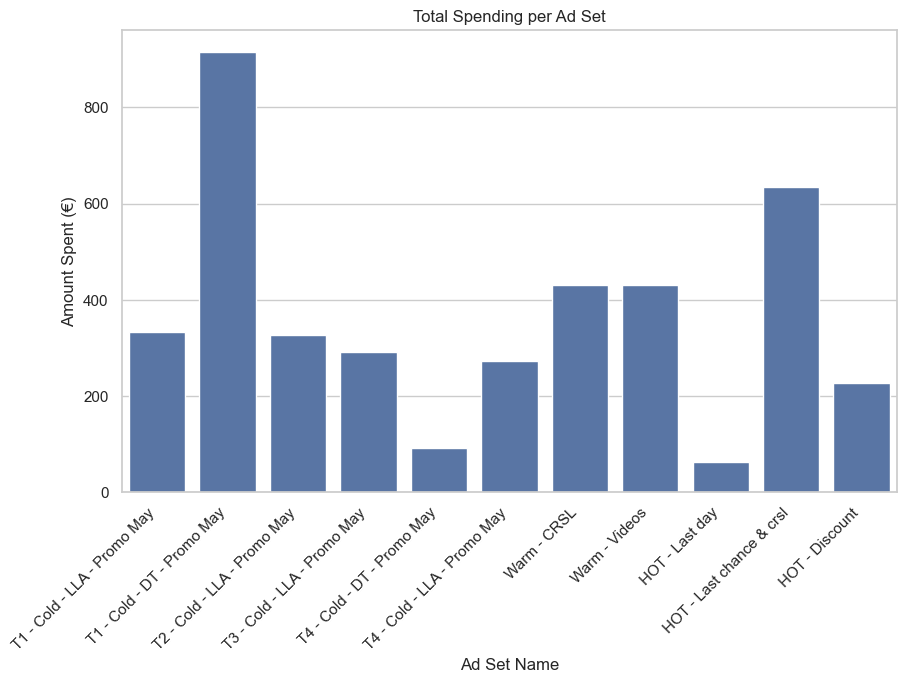

In [58]:
# Total spending by Ad Set Name
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Ad Set Name', y='Amount Spent')
plt.xticks(rotation=45, ha='right')
plt.title("Total Spending per Ad Set")
plt.xlabel("Ad Set Name")
plt.ylabel("Amount Spent (€)")
plt.show()


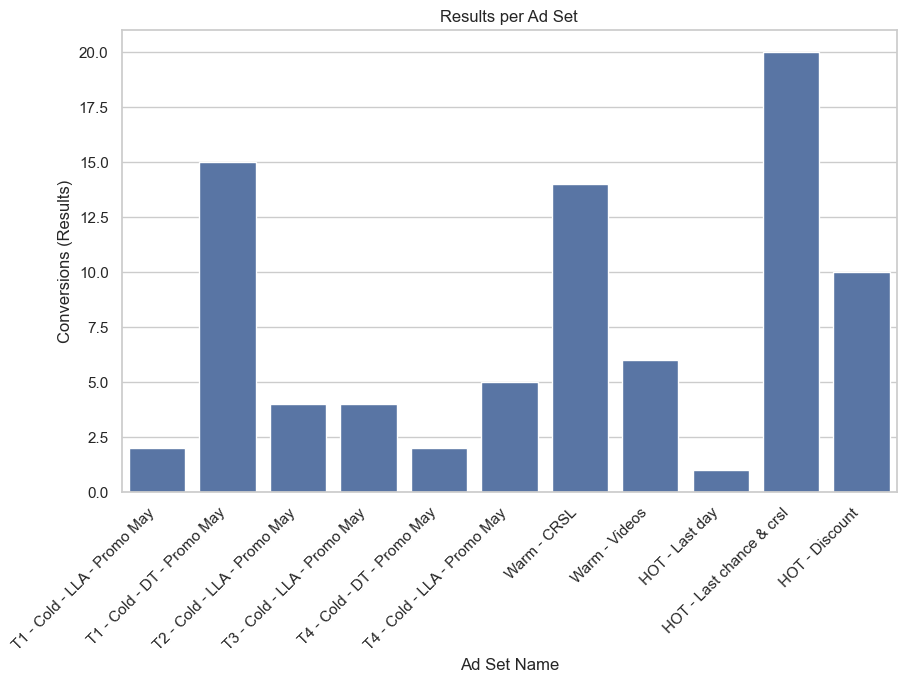

In [59]:
# Results by Ad Set Name
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Ad Set Name', y='Results')
plt.xticks(rotation=45, ha='right')
plt.title("Results per Ad Set")
plt.xlabel("Ad Set Name")
plt.ylabel("Conversions (Results)")
plt.show()

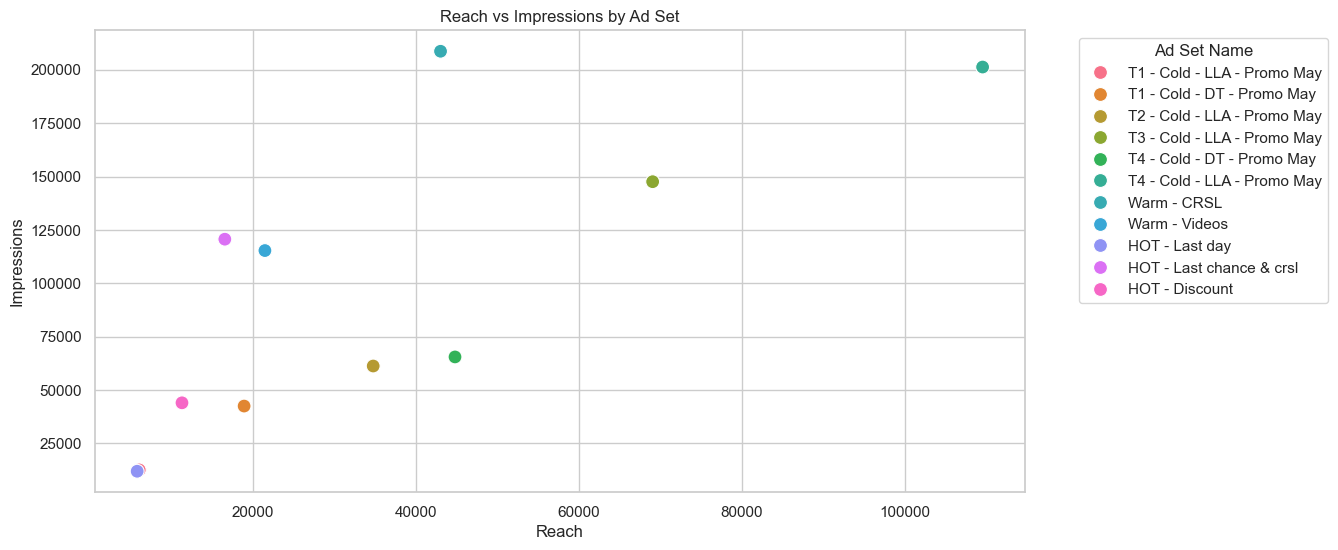

In [60]:
# Reach vs Impressions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Reach', y='Impressions', hue='Ad Set Name', s=100)
plt.title("Reach vs Impressions by Ad Set")
plt.xlabel("Reach")
plt.ylabel("Impressions")
plt.legend(title="Ad Set Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

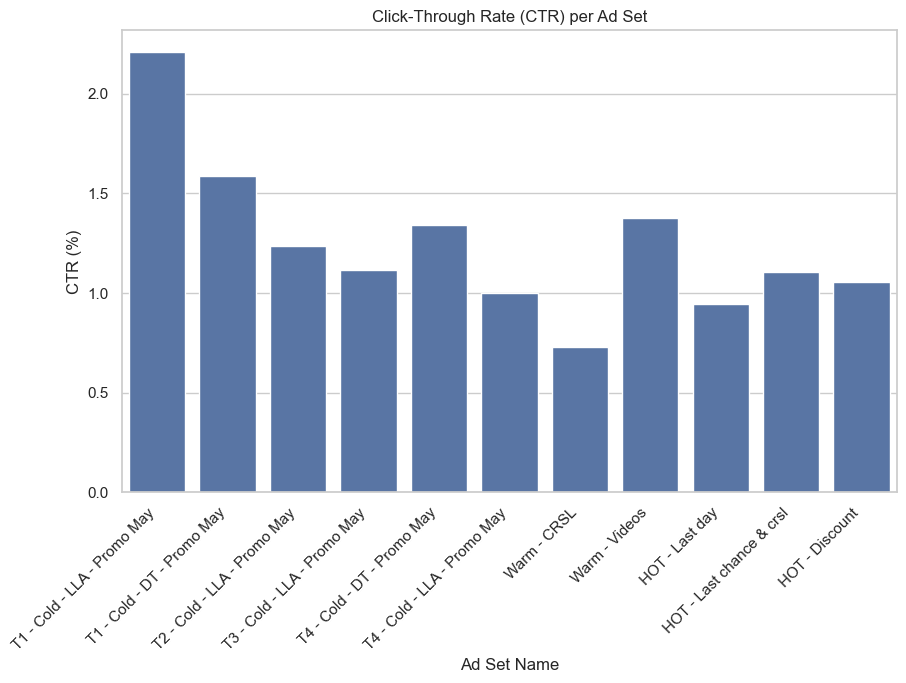

In [61]:
# CTR by Ad Set
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Ad Set Name', y='CTR (all)')
plt.xticks(rotation=45, ha='right')
plt.title("Click-Through Rate (CTR) per Ad Set")
plt.xlabel("Ad Set Name")
plt.ylabel("CTR (%)")
plt.show()

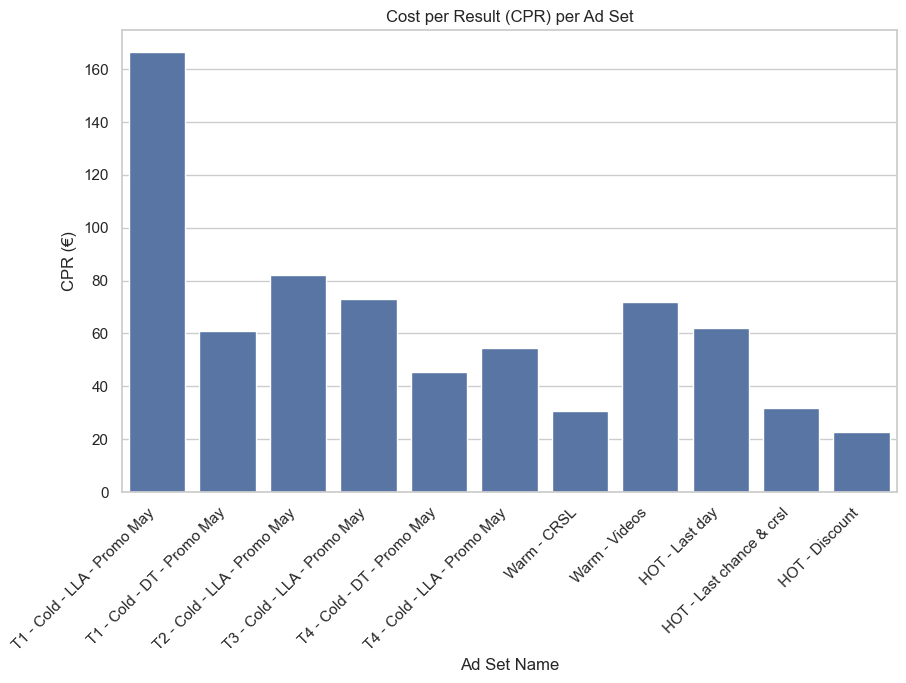

In [62]:
# CPR by Ad Set
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Ad Set Name', y='CPR')
plt.xticks(rotation=45, ha='right')
plt.title("Cost per Result (CPR) per Ad Set")
plt.xlabel("Ad Set Name")
plt.ylabel("CPR (€)")
plt.show()


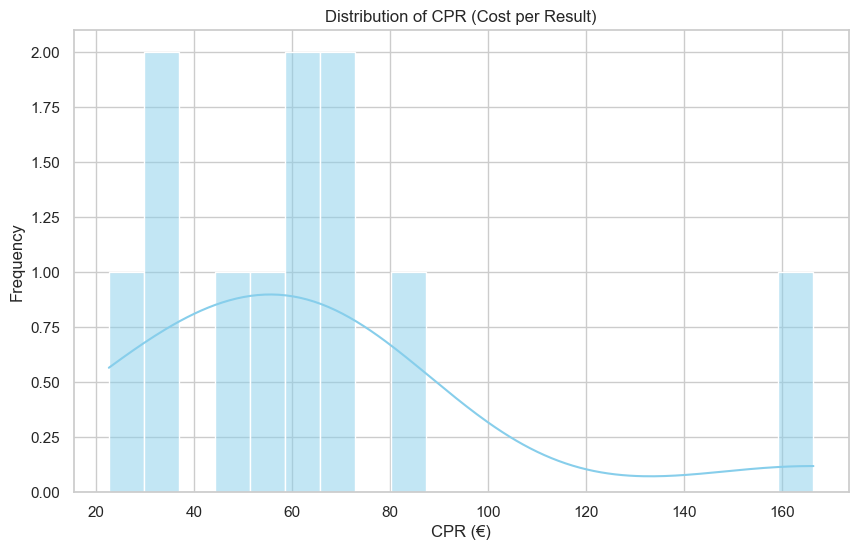

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CPR'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of CPR (Cost per Result)')
plt.xlabel('CPR (€)')
plt.ylabel('Frequency')
plt.show()
